        价格   涨跌幅      成交量         成交额  当前振幅  当前换手率  动态市盈率    量比      代码    名称  \
0  1156.00  3.77    58063  6635936256  4.94   0.46  35.76  1.21  600519  贵州茅台   
1    25.06  3.09  2644569  6541104128  4.24   2.69  21.64  0.87  600030  中信证券   
2    79.18  1.33   717006  5645289728  2.50   0.66   9.69  0.91  601318  中国平安   
3    24.03  9.23  1873971  4331091456  9.32   4.59  63.78  1.31  600703  三安光电   
4    37.32  3.78   906670  3335291520  8.12  10.49  56.03  0.93  601066  中信建投   

             总市值           流通市值    市净率  60日涨幅   今年涨幅       主力流入  
0  1452164656800  1452164656800  11.59  -1.20  -2.28  348453312  
1   303649724504   245955422202   1.88  11.97  -0.95  449349792  
2  1447429514844   857730374952   2.15  -6.56  -7.35  298779584  
3    98004551020    98004551020   4.54  35.92  30.88  326354928  
4   285363097082    32258481904   5.04  64.55  22.76   61016080  
(50, 16)
      名称  target
0   贵州茅台       3
1   中信证券       8
2   中国平安       7
3   三安光电       2
4   中信建投       4
5   海螺

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


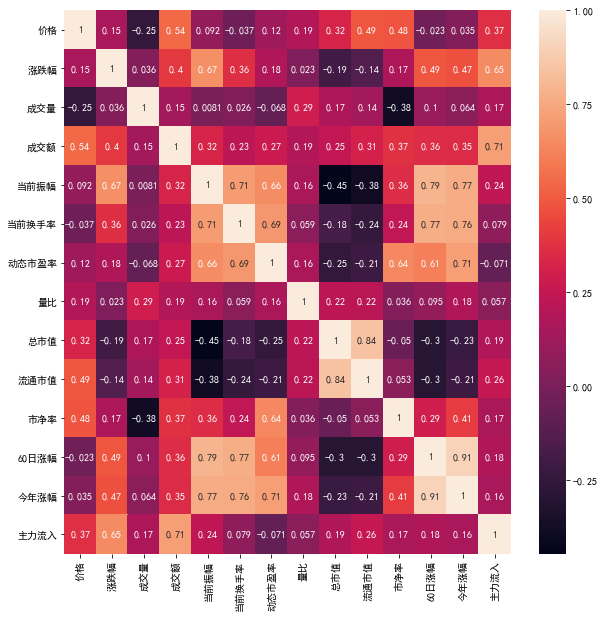

In [16]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data=pd.read_csv("data/train_data_for_50.csv",encoding="utf-8")

print(data.head())
print(data.shape)
#print(data.describe())
#print(data.info())

train_data=data.drop(columns=['代码','名称'],inplace=False)
# 设置plt正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 用热力图呈现特征字段之间的相关性
corr = train_data.corr()
plt.figure(figsize=(10,10))
# annot=True显示每个方格的数据
a=sns.heatmap(corr,annot=True)
a.set_ylim([14,0])#为了让第一行和最后一行都显示出来
# 规范化
train_data=StandardScaler().fit_transform(train_data)
gm = GaussianMixture(n_components=10)
gm.fit(train_data)
labels=gm.predict(train_data)
result=data[['名称']]
result['target']=labels
print(result)
from sklearn.metrics import calinski_harabaz_score
print(calinski_harabaz_score(train_data, labels))